In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_cbg_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBG
0,3,0.0,0.0,0.0,0.0,0.0,0.145484,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.042471
1,3,0.0,0.0,0.0,0.0,0.0,0.145484,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.042471
2,7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,1,0.042471
3,11,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.042471
4,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.042471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42972,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.335907
74996,42973,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.335907
74997,42975,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.335907
74998,42975,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.335907


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..CBG', 'index'], axis = 1)
y = df_knn[['X..CBG']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.04247104],
       [0.04247104],
       [0.04247104],
       ...,
       [0.33590734],
       [0.33590734],
       [0.33590734]])

<AxesSubplot:ylabel='Count'>

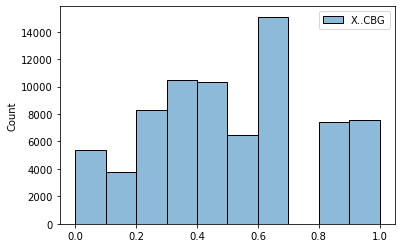

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.04930628022799451

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9131707357180923

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.8643064751685552

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([2.69257838e-04, 1.18195048e-03, 1.40313656e-04, 1.49395085e-04,
       1.41611170e-03, 6.41388160e-04, 3.36282420e-04, 2.96794630e-03,
       9.46756876e-05, 5.96005480e-04, 1.90642478e-04, 1.38986173e-03,
       1.01710756e-04, 2.95836795e-04, 5.92342650e-04, 1.19520931e-04,
       5.16577845e-04, 1.13087438e-03, 2.13902169e-04, 7.87713747e-04,
       8.07994155e-04, 5.70214975e-04, 4.01939307e-04, 2.90727049e-04,
       1.75950093e-04, 1.09732112e-04, 9.89216040e-04, 1.44282811e-04,
       1.10198129e-03, 1.56936261e-02, 2.12873738e-03, 2.59487136e-04,
       6.62278156e-04, 1.93670919e-04, 4.30870082e-04, 4.42046387e-04,
       2.56515820e-03, 2.07185026e-03, 9.92623004e-05, 4.03840868e-04,
       5.73889694e-04, 9.46849186e-04, 8.40414531e-04, 1.97656156e-03,
       1.63535408e-04, 6.39281096e-04, 1.12582320e-03, 1.65153449e-04,
       4.82904301e-04, 3.71723275e-04, 9.16850927e-04, 1.95919405e-04,
       2.01133446e-03, 1.62340852e-03, 1.39167796e-03, 1.23405210e-04,
      

In [16]:
selector.threshold_

0.0021321961620469087

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_7,tfidf_29,tfidf_36,tfidf_56,tfidf_60,tfidf_78,tfidf_96,tfidf_98,tfidf_103,tfidf_117,...,earthy,grape,grapefruit,lemon,lime,orange,skunk,strawberry,tropical,vanilla
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.151083,0.000000,...,0,1,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.151083,0.000000,...,0,1,0,0,1,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.122034,0.140663,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247899,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_7',
 'tfidf_29',
 'tfidf_36',
 'tfidf_56',
 'tfidf_60',
 'tfidf_78',
 'tfidf_96',
 'tfidf_98',
 'tfidf_103',
 'tfidf_117',
 'tfidf_121',
 'tfidf_125',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_154',
 'tfidf_158',
 'tfidf_168',
 'tfidf_176',
 'tfidf_178',
 'tfidf_194',
 'tfidf_199',
 'tfidf_207',
 'tfidf_210',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_267',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_309',
 'tfidf_312',
 'tfidf_320',
 'tfidf_329',
 'tfidf_337',
 'tfidf_342',
 'tfidf_343',
 'tfidf_345',
 'tfidf_359',
 'tfidf_362',
 'hybrid',
 'indica',
 'sativa',
 'aroused',
 'creative',
 'focused',
 'giggly',
 'happy',
 'hungry',
 'relaxed',
 'uplifted',
 'berry',
 'blueberry',
 'cheese',
 'citrus',
 'diesel',
 'earthy',
 'grape',
 'grapefruit',
 'lemon',
 'lime',
 'orange',
 'skunk',
 'strawberry',
 'tropical',
 'vanilla']

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_cbg.pkl")
joblib.dump(selector, "selector_knn_tfidf_cbg.pkl")

['selector_knn_tfidf_cbg.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.049329671733600304

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.010191526160988148

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.10095308891256446

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9107283015604215

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.858500023003275

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [52]:
knreg_ht = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [53]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.020095416239611336

In [54]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.00502148353064928

In [55]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.07086242679057272

In [56]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9890487694471182

In [57]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9302813148048266

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [58]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [59]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_cbg.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_cbg.pkl")

['y_test_knreg_tfidf_cbg.pkl']

In [4]:
import os

os.getcwd()

'/Users/andalanputra/Desktop/masters/thesis/modeling knn tfidf each target'

In [7]:
import joblib

y_pred_knreg_test = joblib.load("/Users/andalanputra/Desktop/masters/thesis/modeling knn tfidf each target/y_pred_knreg_test_tfidf_cbg.pkl")
y_test = joblib.load("/Users/andalanputra/Desktop/masters/thesis/modeling knn tfidf each target/y_test_knreg_tfidf_cbg.pkl")

In [8]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.019981506154648235

In [9]:
r2_score(y_test, y_pred_knreg_test)

0.9303027783595282

In [10]:
mean_squared_error(y_test, y_pred_knreg_test)

0.005066578580806181

In [11]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.07117990292776594

In [12]:
y_test

,X..CBG
11591,0.826255
52020,0.409266
34666,0.262548
22169,0.393822
23049,0.530245
...,...
60863,0.606178
32316,0.532819
60933,0.606178
43206,1.000000


In [13]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

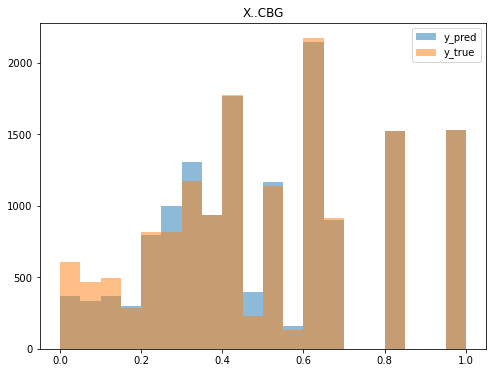

<Figure size 432x288 with 0 Axes>

In [14]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBG"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_cbg.png')

Pearson R

In [67]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.965
P-value: 0.000


<AxesSubplot:>

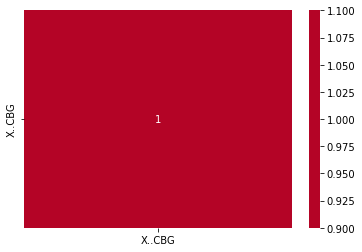

In [68]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)